In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

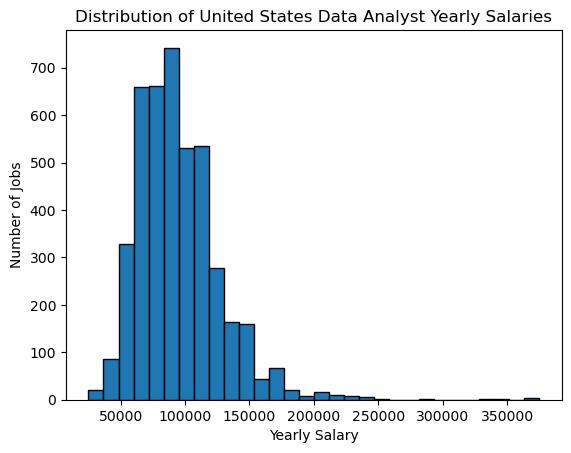

In [3]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
# Plot histogram for yearly average salary


df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
# Alternatively, with matplotlib
# plt.hist(df_DA_US['salary_year_avg'], bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

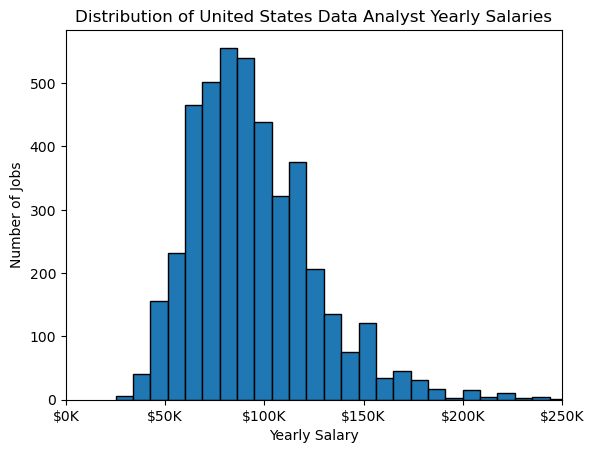

In [4]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

## Problems

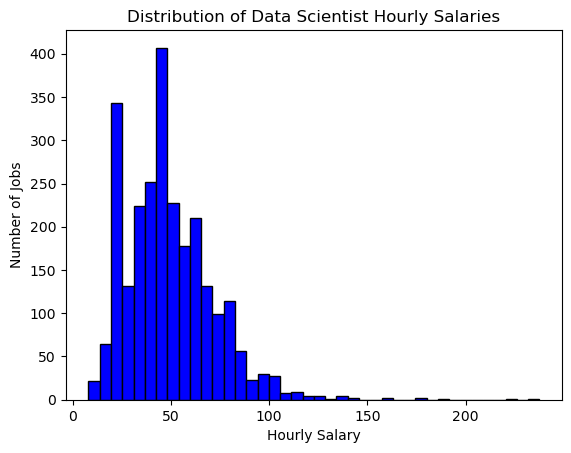

In [5]:
# Problem_1

df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')

plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

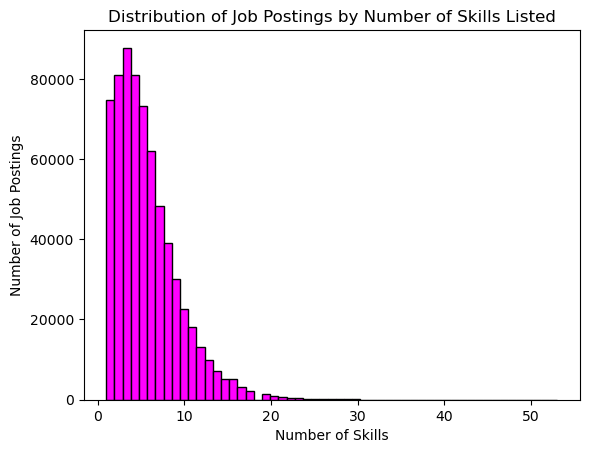

In [6]:
# Problem_2

df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

# Plot the histogram
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

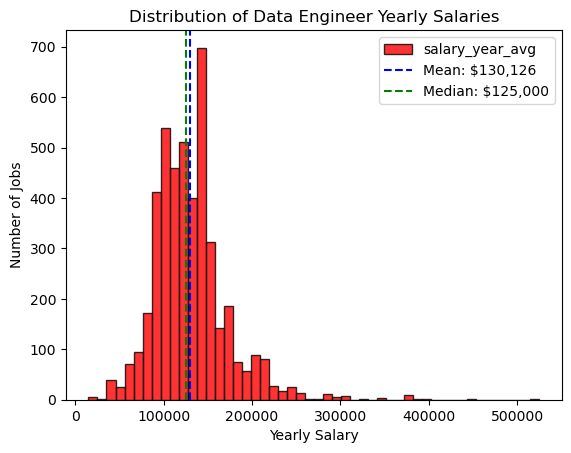

In [10]:
# OProblem_3

df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', alpha=0.8, edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()
